In [2]:
import PIL
from PIL import Image
import numpy as np
import face_recognition
import keras
from keras.models import load_model
import cv2
matplotlib.rcParams['savefig.pad_inches'] = 0

In [254]:
np.set_printoptions(3)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [340]:
print("=" * 5 + " Versions " + "=" * 5)
print("PIL:\t\t\t{0}\nnumpy:\t\t\t{1}\nkeras:\t\t\t{2}\nopencv:\t\t\t{3}\nface_recognition:\t{4}".format(PIL.__version__,
                                                                                                        np.__version__,
                                                                                                        keras.__version__,
                                                                                                        cv2.__version__,
                                                                                                        face_recognition.__version__))

===== Versions =====
PIL:			7.1.1
numpy:			1.18.1
keras:			2.3.1
opencv:			4.2.0
face_recognition:	1.2.3


In [149]:
img1 = np.array(Image.open("images/test_1.jpg"))
img2 = np.array(Image.open("images/test_2.jpg"))
img3 = np.array(Image.open("images/test_3.jpg"))
img4 = np.array(Image.open("images/test_4.jpg"))

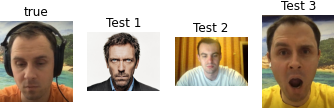

In [341]:
fig, axs = plt.subplots(1, 4)

axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title('true')

axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title('Test 1')

axs[2].imshow(img3)
axs[2].axis('off')
axs[2].set_title('Test 2')

axs[3].imshow(img4)
axs[3].axis('off')
axs[3].set_title('Test 3')

fig.show()

In [151]:
images = {"true" : img1, "test1" : img2, "test2" : img3, "test3" : img4}

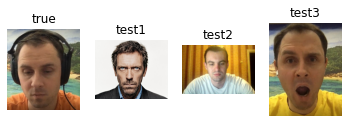

In [152]:
fig, axs = plt.subplots(1, 4)
i = 0
for key in images.keys():
    axs[i].imshow(images[key])
    axs[i].axis('off')
    axs[i].set_title(key)
    i += 1
fig.show()

## Face detection

In [153]:
data_to_detection = {"true" : face_recognition.load_image_file("images/test_1.jpg"),
                     "test1" : face_recognition.load_image_file("images/test_2.jpg"),
                     "test2" : face_recognition.load_image_file("images/test_3.jpg"),
                     "test3" : face_recognition.load_image_file("images/test_4.jpg")}

In [154]:
face_locations = {}
faces = {}

for key in images.keys():
    face_locations[key] = face_recognition.face_locations(data_to_detection[key])
    
    top, right, bottom, left = face_locations[key][0]
    faces[key] = images[key][top:bottom, left:right]

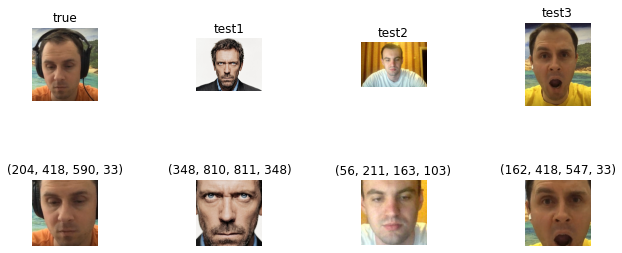

In [155]:
fig, axs = plt.subplots(2, 4, figsize=(10,5))
i = 0
for key in faces.keys():
    axs[0,i].imshow(images[key])
    axs[0,i].axis('off')
    axs[0,i].set_title(key)   
    
    axs[1,i].imshow(faces[key])
    axs[1,i].axis('off')
    axs[1,i].set_title(face_locations[key][0])
    i += 1
plt.subplots_adjust(wspace = 1.5)
fig.show()

## Face recognition

In [156]:
encodings = {}
for key in faces.keys():
    encodings[key] = face_recognition.face_encodings(faces[key])

In [258]:
print(encodings['true'][0])
print(f"len: {len(encodings['true'][0])}")


[-7.996e-02  1.083e-02 -3.591e-03 -8.970e-02 -4.608e-02  4.024e-02
  1.828e-02 -1.453e-01  1.173e-01 -1.190e-01  2.389e-01  6.849e-04
 -3.394e-01  8.291e-03 -2.376e-02  2.455e-02 -2.099e-01 -7.295e-02
 -1.214e-01 -1.328e-01  3.749e-03  7.949e-02  3.523e-02  7.360e-02
 -1.088e-01 -3.044e-01 -7.026e-02 -1.299e-01  9.558e-02 -8.584e-02
  3.239e-02  3.291e-02 -1.043e-01  2.814e-02  1.464e-02  1.103e-02
 -9.243e-02 -1.291e-01  2.912e-01  5.733e-02 -7.530e-02 -1.364e-02
  3.869e-02  2.916e-01  1.991e-01  1.900e-03  2.146e-02 -1.033e-01
  2.096e-01 -3.140e-01  1.047e-01  1.515e-01  1.838e-01  8.987e-02
  1.037e-01 -2.356e-01  3.632e-02  9.698e-02 -1.948e-01  9.745e-02
  4.499e-02 -6.298e-02  7.849e-03 -4.258e-02  2.421e-01  7.946e-02
 -1.626e-01 -8.919e-02  1.699e-01 -1.722e-01 -9.020e-02  6.955e-02
 -1.358e-01 -1.648e-01 -2.233e-01  6.453e-02  3.638e-01  2.090e-01
 -1.588e-01  1.865e-02 -1.263e-01 -4.973e-02  5.308e-02  8.717e-02
 -1.439e-01 -7.432e-02 -6.691e-02  8.983e-03  1.720e-01  2.980

In [259]:
recognition = {"true" : ["person in dbase"],
               "test1" : face_recognition.compare_faces([encodings["true"][0]], encodings["test1"][0], tolerance=0.60),
               "test2" : face_recognition.compare_faces([encodings["true"][0]], encodings["test2"][0], tolerance=0.60),
               "test3" : face_recognition.compare_faces([encodings["true"][0]], encodings["test3"][0], tolerance=0.60)
              }

distance = {"true" : [0],
            "test1" : face_recognition.face_distance([encodings["true"][0]], encodings["test1"][0]),
            "test2" : face_recognition.face_distance([encodings["true"][0]], encodings["test2"][0]),
            "test3" : face_recognition.face_distance([encodings["true"][0]], encodings["test3"][0]),
              }

In [260]:
distance

{'true': [0],
 'test1': array([0.695]),
 'test2': array([0.759]),
 'test3': array([0.433])}

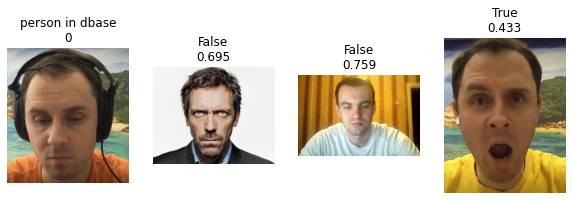

In [261]:
fig, axs = plt.subplots(1, 4, figsize=(10,5))
i = 0
for key in faces.keys():
    axs[i].imshow(images[key])
    axs[i].axis('off')
    axs[i].set_title(str(recognition[key][0]) + "\n" + str(round(distance[key][0], 3)))
    i += 1
fig.show()

### Face landmarks

In [262]:
landmarks = {}
for key in data_to_detection.keys():
    landmarks[key] = face_recognition.face_landmarks(data_to_detection[key], face_locations[key], model='large')

In [263]:
makeup_colors = {'chin' : "gray", 
                 'left_eyebrow' : "green", 
                 'right_eyebrow' : "green", 
                 'nose_bridge' : "gray", 
                 'nose_tip' : "gray", 
                 'left_eye' : "white", 
                 'right_eye' : "white", 
                 'top_lip' : "red", 
                 'bottom_lip' : "red"}

# MAKE UP, MAN

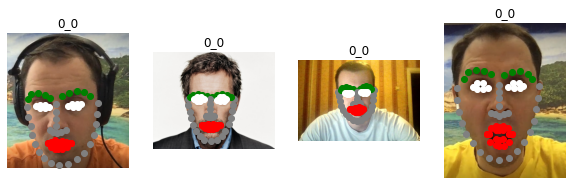

In [264]:
fig, axs = plt.subplots(1, 4, figsize=(10,5))
i = 0
for key in images.keys():
    axs[i].imshow(images[key])
    for k in landmarks[key][0].keys():
        for dot in landmarks[key][0][k]:
            axs[i].scatter(dot[0], dot[1], zorder=2, color=makeup_colors[k])
    axs[i].axis('off')
    axs[i].set_title("0_0")
    i += 1
fig.show()

In [337]:
for key in landmarks["true"][0].keys():
    print(f"KEY : {key}")
    print(landmarks["true"][0][key])

KEY : chin
[(89, 338), (95, 383), (106, 424), (115, 466), (127, 507), (145, 542), (169, 572), (201, 595), (237, 602), (278, 597), (318, 576), (352, 547), (379, 508), (396, 465), (405, 418), (411, 370), (415, 320)]
KEY : left_eyebrow
[(93, 304), (110, 281), (139, 276), (170, 283), (197, 296)]
KEY : right_eyebrow
[(249, 290), (282, 274), (316, 266), (352, 269), (378, 289)]
KEY : nose_bridge
[(224, 325), (224, 359), (223, 391), (223, 425)]
KEY : nose_tip
[(194, 444), (210, 453), (227, 459), (247, 451), (266, 443)]
KEY : left_eye
[(129, 335), (148, 329), (170, 329), (192, 338), (171, 344), (148, 345)]
KEY : right_eye
[(275, 334), (297, 324), (319, 323), (338, 327), (322, 339), (299, 340)]
KEY : top_lip
[(185, 504), (201, 497), (216, 491), (231, 497), (248, 492), (269, 496), (293, 502), (283, 504), (248, 504), (231, 506), (216, 504), (194, 506)]
KEY : bottom_lip
[(293, 502), (271, 520), (250, 528), (233, 531), (217, 528), (200, 520), (185, 504), (194, 506), (217, 507), (232, 510), (249, 508

In [333]:
def cool_mask(image, landmarks):
    plt.imshow(image)

    plt.plot([landmarks["chin"][0][0], landmarks["chin"][2][0]], [landmarks["chin"][0][1], landmarks["chin"][2][1]], zorder=2, color="white")
    plt.plot([landmarks["chin"][2][0], landmarks["chin"][4][0]], [landmarks["chin"][2][1], landmarks["chin"][4][1]], zorder=2, color="white")
    plt.plot([landmarks["chin"][4][0], landmarks["chin"][8][0]], [landmarks["chin"][4][1], landmarks["chin"][8][1]], zorder=2, color="white")
    plt.plot([landmarks["chin"][8][0], landmarks["chin"][11][0]], [landmarks["chin"][8][1], landmarks["chin"][11][1]], zorder=2, color="white")
    plt.plot([landmarks["chin"][11][0], landmarks["chin"][13][0]], [landmarks["chin"][11][1], landmarks["chin"][13][1]], zorder=2, color="white")
    plt.plot([landmarks["chin"][13][0], landmarks["chin"][-1][0]], [landmarks["chin"][13][1], landmarks["chin"][-1][1]], zorder=2, color="white")
    
    hcent = (landmarks["right_eyebrow"][0][0] - landmarks["left_eyebrow"][-1][0]) / 2
    vcent = (landmarks["right_eyebrow"][0][1] - landmarks["left_eyebrow"][-1][1])
    
    plt.plot([landmarks["chin"][0][0], landmarks["left_eyebrow"][-1][0] + hcent], [landmarks["chin"][0][1], landmarks["left_eyebrow"][-1][1] + vcent], zorder=2, color="white")
    plt.plot([landmarks["chin"][-1][0], landmarks["left_eyebrow"][-1][0] + hcent], [landmarks["chin"][-1][1], landmarks["left_eyebrow"][-1][1] + vcent], zorder=2, color="white")
    
    plt.plot([landmarks["left_eyebrow"][-1][0] + hcent, landmarks["nose_bridge"][-1][0]], [landmarks["left_eyebrow"][-1][1] + vcent, landmarks["nose_bridge"][-1][1]], zorder=2, color="white")
    
    plt.plot([landmarks["nose_bridge"][-1][0], landmarks["nose_tip"][-1][0]], [landmarks["nose_bridge"][-1][1], landmarks["nose_tip"][-1][1]], zorder=2, color="white")
    plt.plot([landmarks["nose_tip"][-1][0], landmarks["chin"][-1][0]], [landmarks["nose_tip"][-1][1], landmarks["chin"][-1][1]], zorder=2, color="white")
    
    plt.plot([landmarks["nose_bridge"][-1][0], landmarks["nose_tip"][0][0]], [landmarks["nose_bridge"][-1][1], landmarks["nose_tip"][0][1]], zorder=2, color="white")
    plt.plot([landmarks["nose_tip"][0][0], landmarks["chin"][0][0]], [landmarks["nose_tip"][0][1], landmarks["chin"][0][1]], zorder=2, color="white")
    

    plt.plot([landmarks["nose_tip"][0][0], landmarks["top_lip"][9][0]], [landmarks["nose_tip"][0][1], landmarks["top_lip"][9][1]], zorder=2, color="white")
    plt.plot([landmarks["nose_tip"][-1][0], landmarks["top_lip"][9][0]], [landmarks["nose_tip"][-1][1], landmarks["top_lip"][9][1]], zorder=2, color="white")
    plt.plot([landmarks["top_lip"][9][0], landmarks["chin"][4][0]], [landmarks["top_lip"][9][1], landmarks["chin"][4][1]], zorder=2, color="white")
    plt.plot([landmarks["top_lip"][9][0], landmarks["chin"][11][0]], [landmarks["top_lip"][9][1], landmarks["chin"][11][1]], zorder=2, color="white")
    plt.plot([landmarks["top_lip"][9][0], landmarks["chin"][8][0]], [landmarks["top_lip"][9][1], landmarks["chin"][8][1]], zorder=2, color="white")
    plt.axis('off')
    
    plt.show()

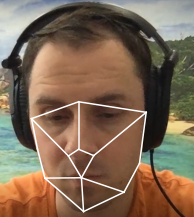

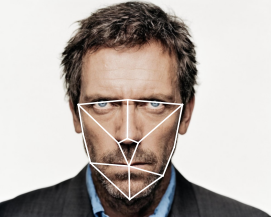

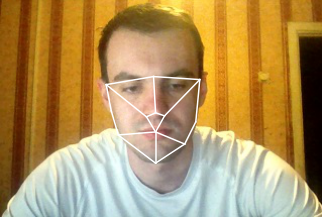

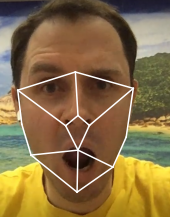

In [338]:
for key in images.keys():
    cool_mask(images[key], landmarks[key][0])

## Emotion recognition

In [277]:
data_for_emotion = {}
for key in faces.keys():
    data_for_emotion[key] = np.reshape(cv2.cvtColor(cv2.resize(faces[key], (48,48)), cv2.COLOR_BGR2GRAY), (1,48, 48,1))

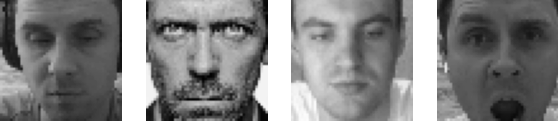

In [339]:
fig, axs = plt.subplots(1, 4, figsize=(10,5))
i = 0
for key in data_for_emotion.keys():
    axs[i].imshow(data_for_emotion[key][0,:,:,0], cmap='gray', vmin=0, vmax=255)
    axs[i].axis('off')
    i += 1
fig.show()

In [279]:
emotion_dict= {'Гнев': 0, 'Печаль': 5, 'Нейтральное': 4, 'Отвращение': 1, 'Удивление': 6, 'Страх': 2, 'Счастье': 3}

In [280]:
emotion_predictor = load_model("models/model_v6_23.hdf5")

In [281]:
emotions_predict = {}

for key in data_for_emotion.keys():
    temp = np.argmax(emotion_predictor.predict(data_for_emotion[key]))
    label_map = dict((v,k) for k,v in emotion_dict.items())
    emotions_predict[key] = label_map[temp]

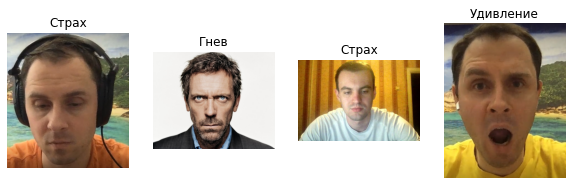

In [282]:
fig, axs = plt.subplots(1, 4, figsize=(10,5))
i = 0
for key in faces.keys():
    axs[i].imshow(images[key])
    axs[i].axis('off')
    axs[i].set_title(emotions_predict[key])
    i += 1
fig.show()

## END!